# 1. Import Libaries

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

%matplotlib inline


# 2. Import Dataset

In [2]:
# Import Dataset

df_clean = pd.read_csv("df_clean.csv")

# 3. Check Dataset

In [3]:
# Check dataset

df_clean.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,...,VAX_DATE,ONSET_DATE,NUMDAYS,BIRTH_DEFECT,ER_ED_VISIT,VAX_MANU,VAX_DOSE_SERIES,VAX_SITE,VAX_NAME,SYMPTOM1
0,916600,01/01/2021,TX,33.0,1,0,0,0,0,0,...,2020-12-28,2020-12-30,2,0,0,MODERNA,0,LA,COVID19 (COVID19 (MODERNA)),Non-Myocarditis-related
1,916601,01/01/2021,CA,73.0,1,0,0,0,0,0,...,2020-12-31,2020-12-31,0,0,0,MODERNA,0,RA,COVID19 (COVID19 (MODERNA)),Non-Myocarditis-related
2,916602,01/01/2021,WA,23.0,1,0,0,0,0,0,...,2020-12-31,2020-12-31,0,0,1,PFIZER\BIONTECH,0,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),Non-Myocarditis-related
3,916604,01/01/2021,TX,47.0,1,0,0,0,0,0,...,2020-12-22,2020-12-29,7,0,0,MODERNA,0,LA,COVID19 (COVID19 (MODERNA)),Non-Myocarditis-related
4,916606,01/01/2021,NV,44.0,1,0,0,0,0,0,...,2020-12-29,2020-12-29,0,0,0,MODERNA,0,LA,COVID19 (COVID19 (MODERNA)),Non-Myocarditis-related


In [4]:
# Remove VAX_NAME column because it is the same as the VAX_MENU column

df_clean = df_clean.drop('VAX_NAME', axis=1)

# 4. Exploratory Data Analysis (EDA)

In this step, we will be conducint EDA. This mainly shows the distribution of the features between the myocarditis/pericarditis patients and non-myocarditis/pericarditis patients.  

# 4.1 Age Distribution 

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Frequency'>

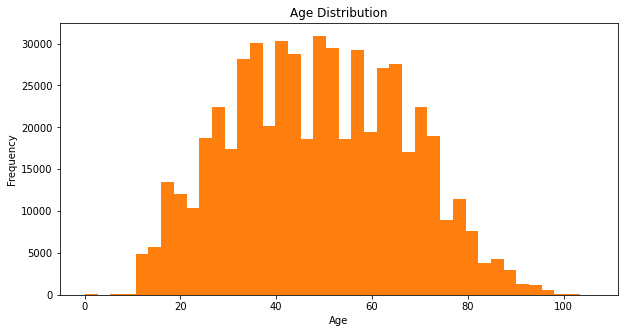

In [5]:
df_clean['AGE_YRS'].plot(kind='hist', bins=40, figsize=(10,5))
plt.xlabel('Age')
plt.title('Age Distribution')

df_clean['AGE_YRS'].plot(kind='hist', bins=40, figsize=(10,5))

Text(0, 0.5, 'Frequency')

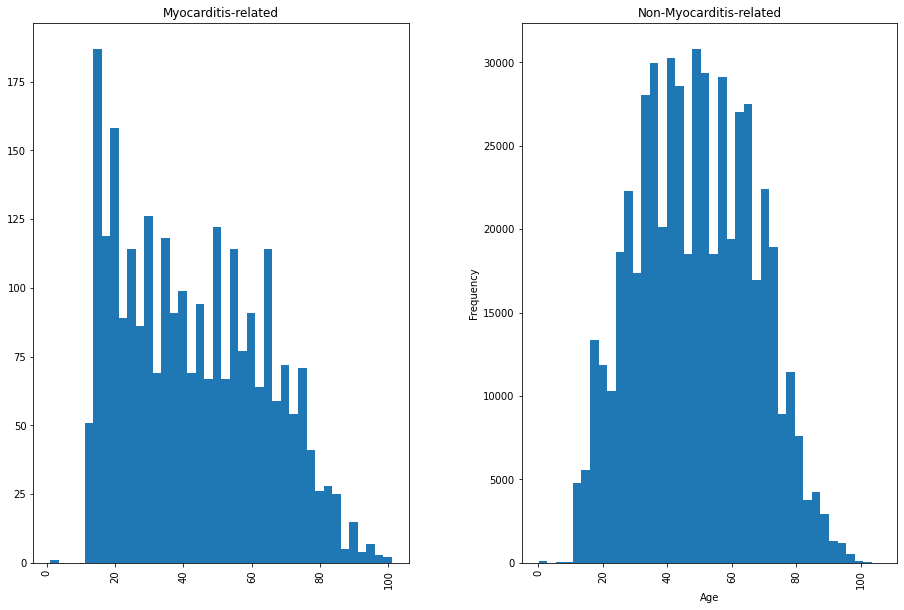

In [6]:
# Age distribution between myocarditis adverse events and non-myocarditis events

df_clean['AGE_YRS'].hist(by=df_clean['SYMPTOM1'], figsize=(15,10), bins=40)
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4.2 Gender Distribution

<AxesSubplot:xlabel='SEX', ylabel='count'>

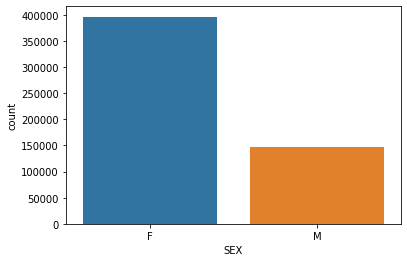

In [7]:
# Gender Distribution

# Convert Sex into labels temporarily
df_clean['SEX'] = df_clean['SEX'].replace({
    
    1:'F',
    0:'M'
    
})

sns.countplot(x="SEX", data=df_clean)


Text(0, 0.5, 'Count')

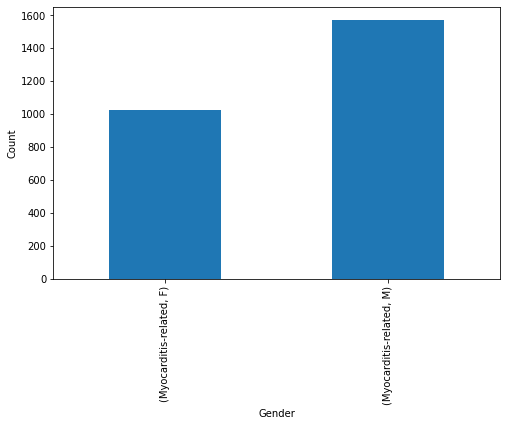

In [8]:
# Gender Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','SEX']).size()

temp[[0,1]].plot.bar(figsize=(8,5))
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

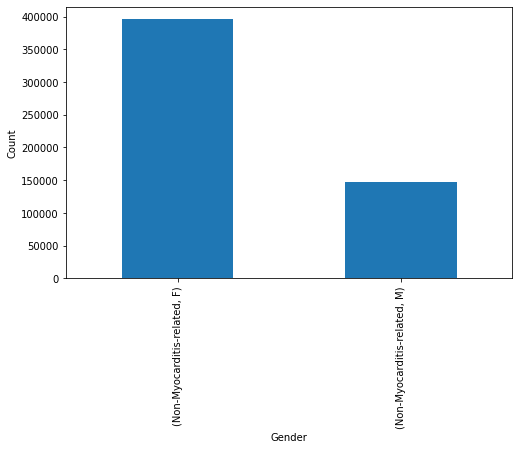

In [9]:
# Gender Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))
plt.xlabel('Gender')
plt.ylabel('Count')

In [10]:
# Binarise Sex column

df_clean['SEX'] = df_clean['SEX'].replace({
    'F':1,
    'M':0,
    'U':2
})

df_clean['SEX'] = df_clean['SEX'].astype('int')

# 4.3 Death Distribution

<AxesSubplot:xlabel='DIED', ylabel='count'>

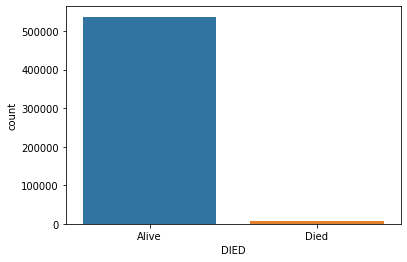

In [11]:
# Death Distribution

# Convert Death into labels temporarily
df_clean['DIED'] = df_clean['DIED'].replace({
    
    1:'Died',
    0:'Alive'
    
})

sns.countplot(x="DIED", data=df_clean)


Text(0, 0.5, 'Count')

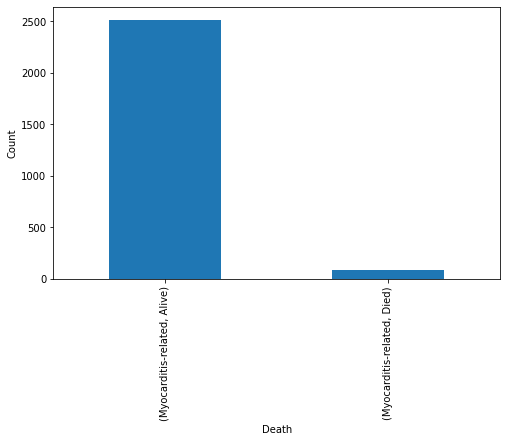

In [12]:
# Death Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','DIED']).size()

temp[[0,1]].plot.bar(figsize=(8,5))
plt.xlabel('Death')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

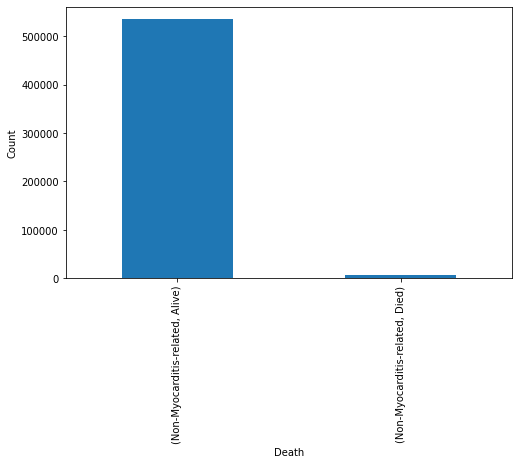

In [13]:
# Death Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5)) 
plt.xlabel('Death')
plt.ylabel('Count')

In [14]:
# Binarise Death 

df_clean['DIED'] = df_clean['DIED'].replace({
    'Died':1,
    'Alive':0
})

df_clean['DIED'] = df_clean['DIED'].astype('int')

# 4.4 Life Threatening Condition Distribution

<AxesSubplot:xlabel='L_THREAT', ylabel='count'>

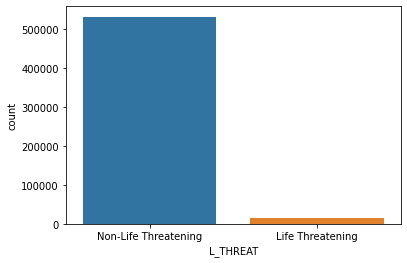

In [15]:
# L_THREAT Distribution

# Convert L_Threat into labels temporarily
df_clean['L_THREAT'] = df_clean['L_THREAT'].replace({
    
    1:'Life Threatening',
    0:'Non-Life Threatening'
    
})

sns.countplot(x="L_THREAT", data=df_clean)

Text(0, 0.5, 'Count')

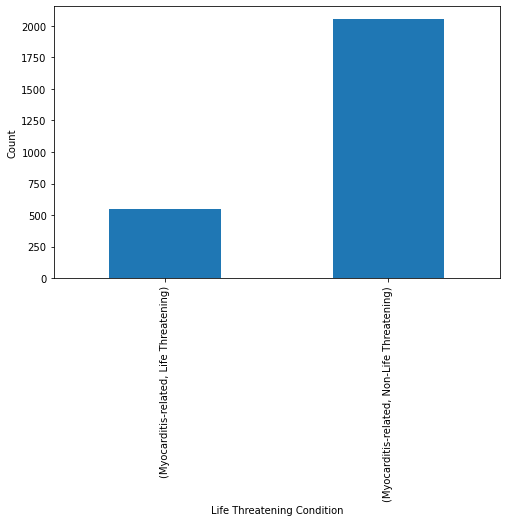

In [16]:
# Life Threatening Condition Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','L_THREAT']).size()

temp[[0,1]].plot.bar(figsize=(8,5))
plt.xlabel('Life Threatening Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

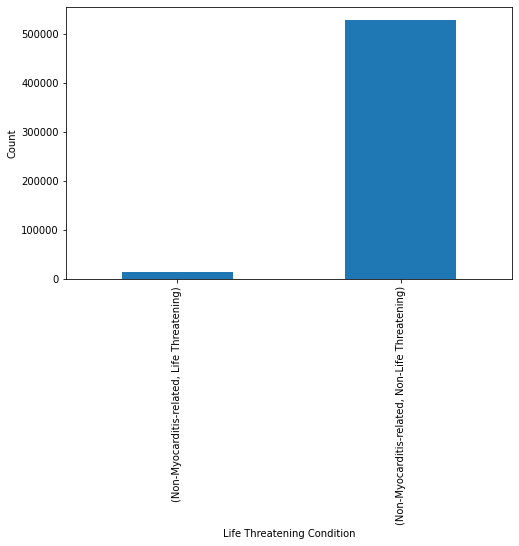

In [17]:
# Life Threatening Condition Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))
plt.xlabel('Life Threatening Condition')
plt.ylabel('Count')

In [18]:
# Binarise Life Threatening Condition

df_clean['L_THREAT'] = df_clean['L_THREAT'].replace({
    'Life Threatening':1,
    'Non-Life Threatening':0
})

df_clean['L_THREAT'] = df_clean['L_THREAT'].astype('int')

# 4.5 Hospitalisation Distribution 

<AxesSubplot:xlabel='HOSPITAL', ylabel='count'>

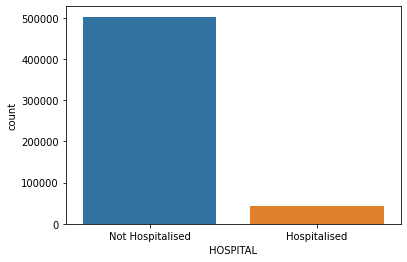

In [19]:
# Hospitalisation Distribution

# Convert Hospitalization into labels temporarily
df_clean['HOSPITAL'] = df_clean['HOSPITAL'].replace({
    
    1:'Hospitalised',
    0:'Not Hospitalised'
    
})

sns.countplot(x="HOSPITAL", data=df_clean)

Text(0, 0.5, 'Count')

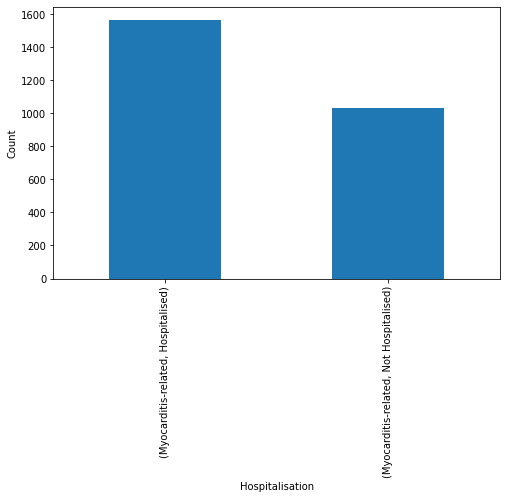

In [20]:
# Hospitalisation Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','HOSPITAL']).size()

temp[[0,1]].plot.bar(figsize=(8,5))
plt.xlabel('Hospitalisation')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

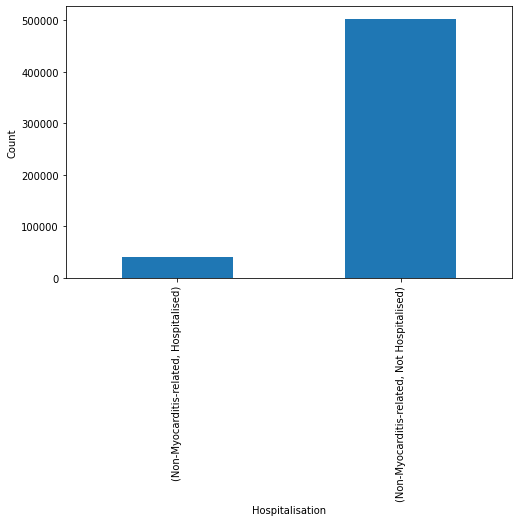

In [21]:
# Hospitalisation Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))
plt.xlabel('Hospitalisation')
plt.ylabel('Count')

In [22]:
# Binarise Hospitalisation

df_clean['HOSPITAL'] = df_clean['HOSPITAL'].replace({
    'Hospitalised':1,
    'Not Hospitalised':0
})

df_clean['HOSPITAL'] = df_clean['HOSPITAL'].astype('int')

# 4.6 Number of days Hospitalised 

Text(0, 0.5, 'Number of Days Hospitalised')

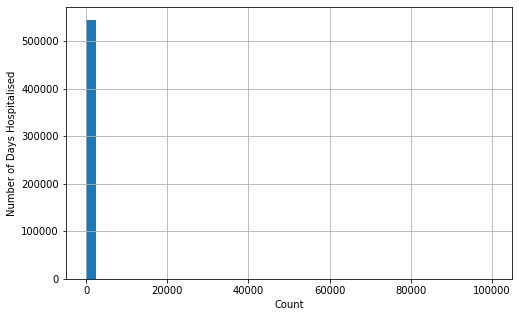

In [23]:
# HOSPDAYS

df_clean['HOSPDAYS'].hist(figsize=(8,5), bins=40)
plt.xlabel('Count')
plt.ylabel('Number of Days Hospitalised')

Text(0, 0.5, 'Number of Days Hospitalised')

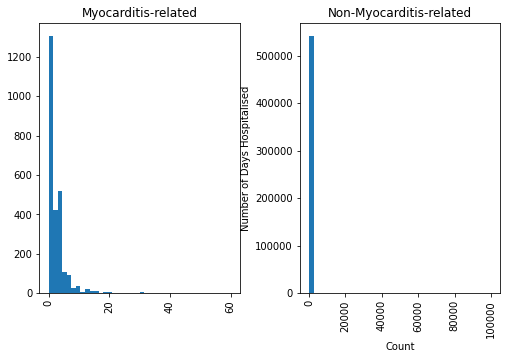

In [24]:
# Hospitalisation Days Distribution for those who have or not have myocarditis/pericarditis related symptoms

df_clean['HOSPDAYS'].hist(by=df_clean['SYMPTOM1'], figsize=(8,5), bins=40)
plt.xlabel('Count')
plt.ylabel('Number of Days Hospitalised')

# 4.7 Extended Hospitalisation Stay

<AxesSubplot:xlabel='X_STAY', ylabel='count'>

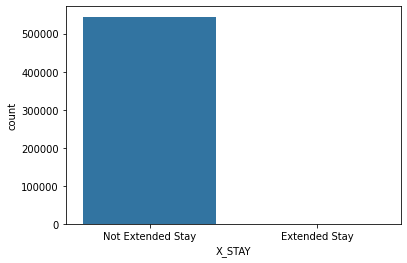

In [25]:
# Extended Hospitalisation Stay Distribution

# Convert Extended Hospitalization into labels temporarily
df_clean['X_STAY'] = df_clean['X_STAY'].replace({
    
    1:'Extended Stay',
    0:'Not Extended Stay'
    
})

sns.countplot(x="X_STAY", data=df_clean)

Text(0, 0.5, 'Count')

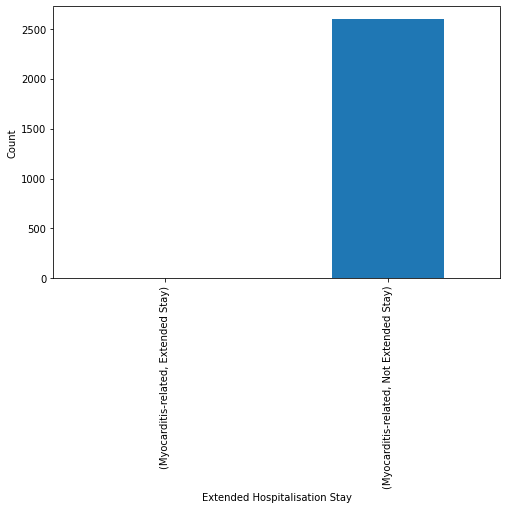

In [26]:
# Extended Hospitalisation Stay Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','X_STAY']).size()

temp[[0,1]].plot.bar(figsize=(8,5))
plt.xlabel('Extended Hospitalisation Stay')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

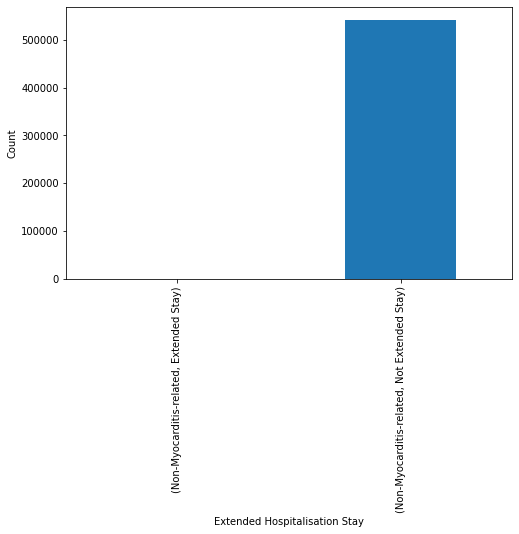

In [27]:
# Extended Hospitalisation Stay Distribution for those who have myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))
plt.xlabel('Extended Hospitalisation Stay')
plt.ylabel('Count')

In [28]:
# Binarise Extended Stay

df_clean['X_STAY'] = df_clean['X_STAY'].replace({
    'Extended Stay':1,
    'Not Extended Stay':0
})

df_clean['X_STAY'] = df_clean['X_STAY'].astype('int')

# 4.8 Disability Distribution

<AxesSubplot:xlabel='DISABLE', ylabel='count'>

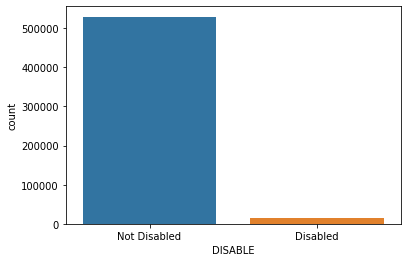

In [29]:
# Disability Distribution

# Convert Disability into labels temporarily
df_clean['DISABLE'] = df_clean['DISABLE'].replace({
    
    1:'Disabled',
    0:'Not Disabled'
    
})

sns.countplot(x="DISABLE", data=df_clean)

Text(0, 0.5, 'Count')

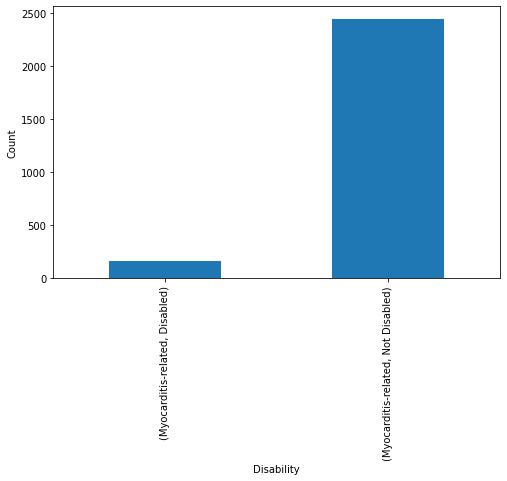

In [30]:
# Disability Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','DISABLE']).size()
temp[[0,1]].plot.bar(figsize=(8,5))

plt.xlabel('Disability')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

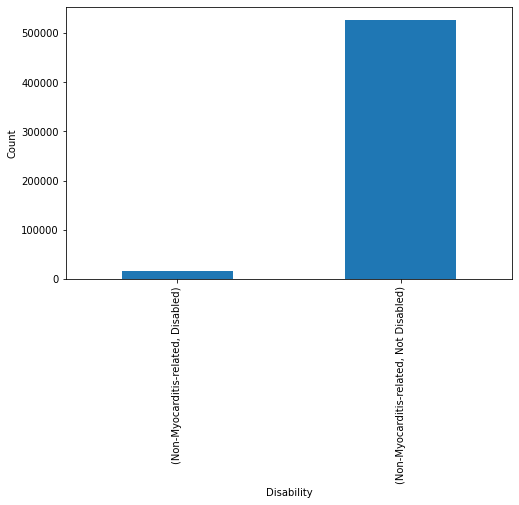

In [31]:
# Disability Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))

plt.xlabel('Disability')
plt.ylabel('Count')

In [32]:
# Binarise Disability 

df_clean['DISABLE'] = df_clean['DISABLE'].replace({
    'Disabled':1,
    'Not Disabled':0
})

df_clean['DISABLE'] = df_clean['DISABLE'].astype('int')

# 4.9 Number of Days between Vaccination and Onset of AE

Text(0, 0.5, 'Count')

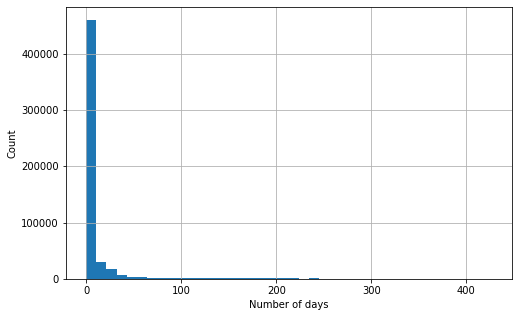

In [33]:
# NUMDAYS

df_clean['NUMDAYS'].hist(figsize=(8,5), bins=40)
plt.xlabel('Number of days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

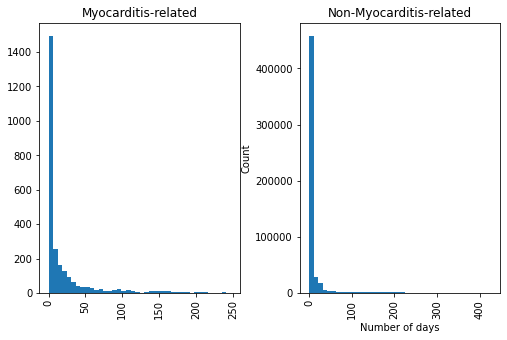

In [34]:
df_clean['NUMDAYS'].hist(by=df_clean['SYMPTOM1'], figsize=(8,5), bins=40)
plt.xlabel('Number of days')
plt.ylabel('Count')

# 4.10 Birth Defect

<AxesSubplot:xlabel='BIRTH_DEFECT', ylabel='count'>

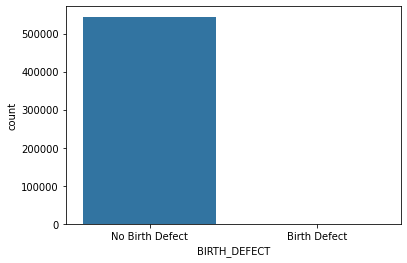

In [35]:
# Birth Defect Distribution

# Convert Birth Defect into labels temporarily
df_clean['BIRTH_DEFECT'] = df_clean['BIRTH_DEFECT'].replace({
    
    1:'Birth Defect',
    0:'No Birth Defect'
    
})

sns.countplot(x="BIRTH_DEFECT", data=df_clean)

Text(0, 0.5, 'Count')

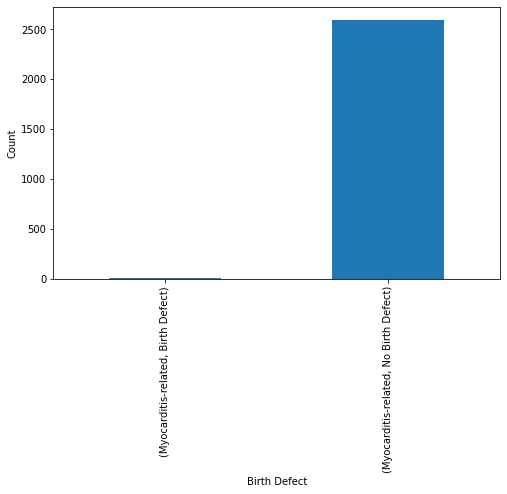

In [36]:
# Birth Defect Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','BIRTH_DEFECT']).size()

temp[[0,1]].plot.bar(figsize=(8,5))

plt.xlabel('Birth Defect')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

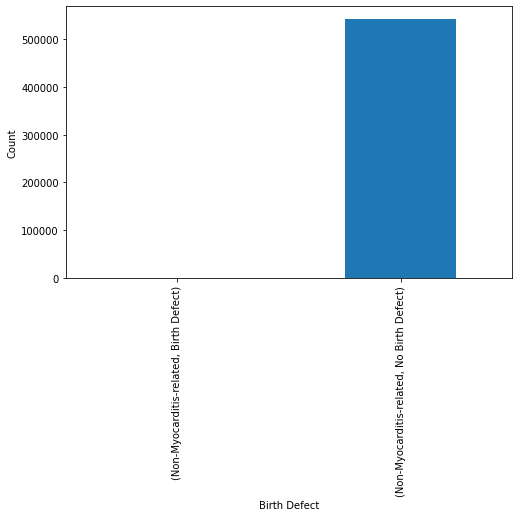

In [37]:
# Birth Defect Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))

plt.xlabel('Birth Defect')
plt.ylabel('Count')

In [38]:
# Binarise Birth Defect

df_clean['BIRTH_DEFECT'] = df_clean['BIRTH_DEFECT'].replace({
    'Birth Defect':1,
    'No Birth Defect':0
})

df_clean['BIRTH_DEFECT'] = df_clean['BIRTH_DEFECT'].astype('int')

# 4.11 ER_ED_VISIT Distribution

<AxesSubplot:xlabel='ER_ED_VISIT', ylabel='count'>

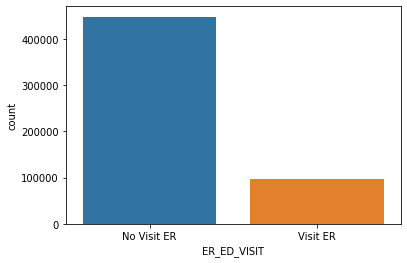

In [39]:
# ER_ED_VISIT Distribution

# Convert ER_ED_VISIT into labels temporarily

df_clean['ER_ED_VISIT'] = df_clean['ER_ED_VISIT'].replace({
    
    1:'Visit ER',
    0:'No Visit ER'
    
})

sns.countplot(x="ER_ED_VISIT", data=df_clean)

Text(0, 0.5, 'Count')

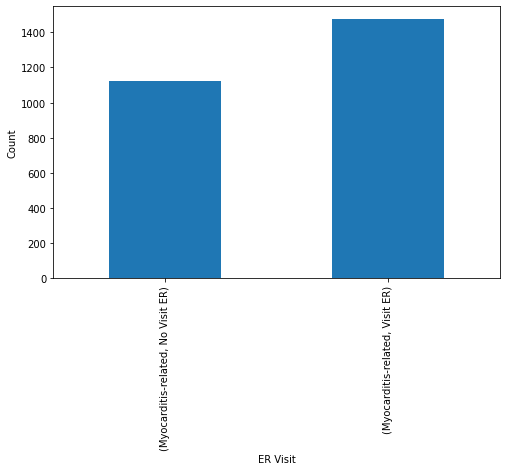

In [40]:
# ER_ED VISIT Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','ER_ED_VISIT']).size()

temp[[0,1]].plot.bar(figsize=(8,5))

plt.xlabel('ER Visit')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

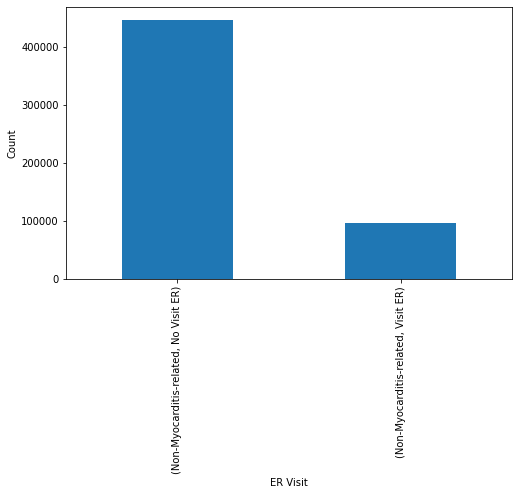

In [41]:
# ER_ED VISIT Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[2,3]].plot.bar(figsize=(8,5))

plt.xlabel('ER Visit')
plt.ylabel('Count')

In [42]:
# Binarise ER_ED_VISIT

df_clean['ER_ED_VISIT'] = df_clean['ER_ED_VISIT'].replace({
    'Visit ER':1,
    'No Visit ER':0
})

df_clean['ER_ED_VISIT'] = df_clean['ER_ED_VISIT'].astype('int')

# 4.12 Vaccination Manu Distribution

<AxesSubplot:xlabel='VAX_MANU', ylabel='count'>

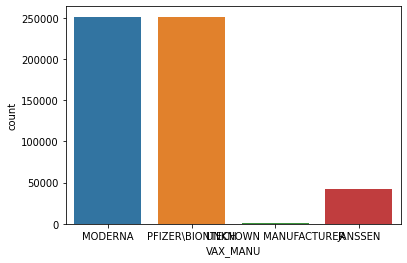

In [43]:
# VAX MANU Distribution

sns.countplot(x="VAX_MANU", data=df_clean)

Text(0, 0.5, 'Count')

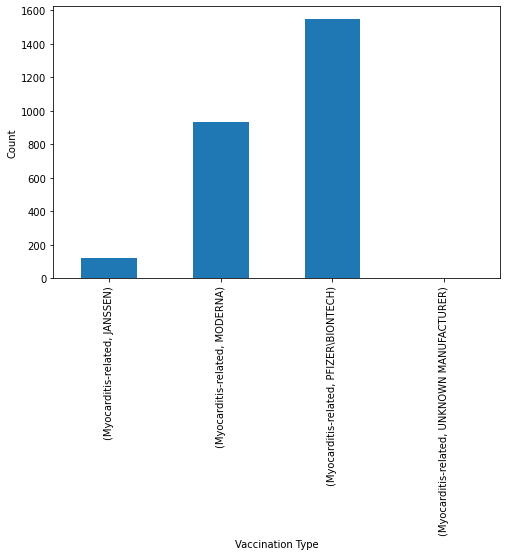

In [44]:
# VAX MANU Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','VAX_MANU']).size()

temp[[0,1,2,3]].plot.bar(figsize=(8,5))
plt.xlabel('Vaccination Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

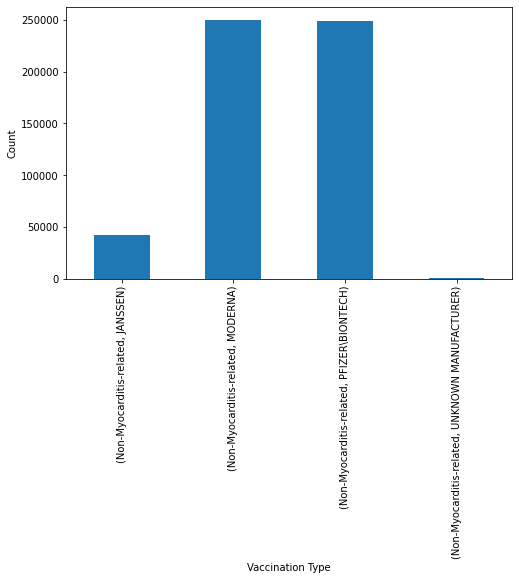

In [45]:
# VAX MANU Distribution for those who have non-myocarditis/pericarditis related symptoms

temp[[4,5,6,7]].plot.bar(figsize=(8,5))
plt.xlabel('Vaccination Type')
plt.ylabel('Count')

# 4.13 Vaccination Site

<AxesSubplot:xlabel='VAX_MANU', ylabel='count'>

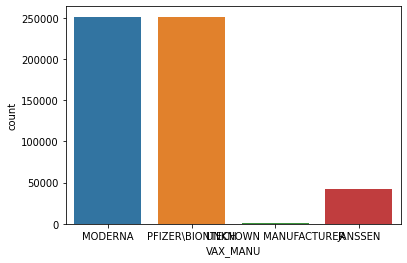

In [46]:
# Vaccination site Distribution

sns.countplot(x="VAX_MANU", data=df_clean)

Text(0, 0.5, 'Count')

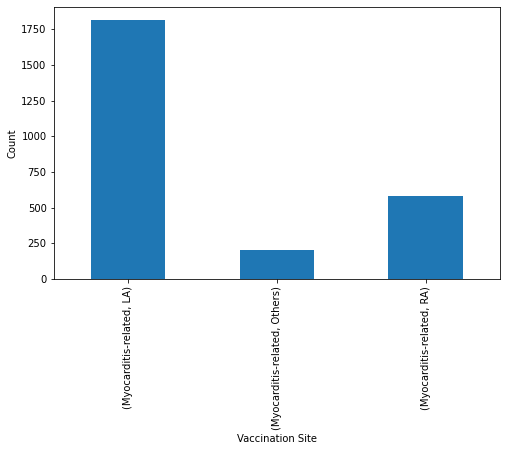

In [47]:
# Vaccination Site Distribution for those who have myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','VAX_SITE']).size()

temp[[0,1,2]].plot.bar(figsize=(8,5))
plt.xlabel('Vaccination Site')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

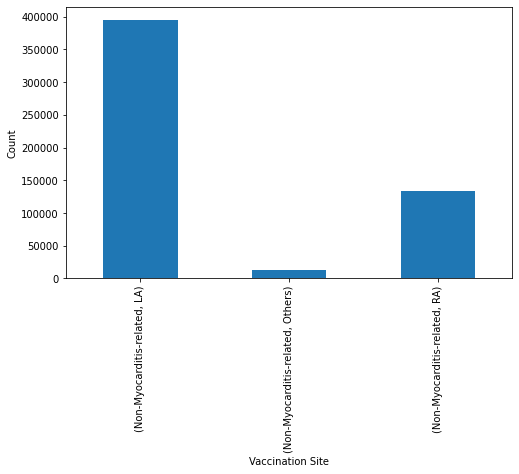

In [48]:
# VAX MANU Distribution for those who have non-myocarditis/pericarditis related symptoms

temp = df_clean.groupby(['SYMPTOM1','VAX_SITE']).size()

temp[[3,4,5]].plot.bar(figsize=(8,5))
plt.xlabel('Vaccination Site')
plt.ylabel('Count')

# 4.15 Correlation Matrix

<AxesSubplot:>

<Figure size 1080x1080 with 0 Axes>

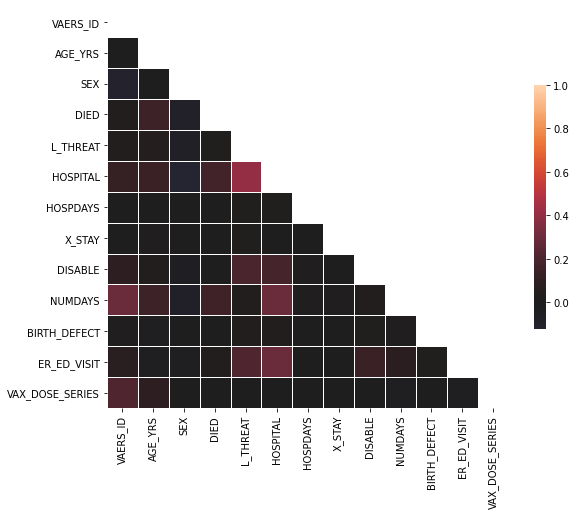

In [49]:
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df_clean.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_clean.corr(), mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(df_clean.corr(), annot=True)

# 5. Biostatistics of demographics and feature information

In this step, we will be conducting biostatistical tests:
    
1. Mannwhitney U test for continuous features because the distribution are not normal
2. Chi-Square test for binary categorical features and multi-categorical features

The statistics complements the EDA well since they are both derived from the distribution of the data. The p-values can also be used for feature selection. Selecting only features that are statistically significant. However, this can also yield poorer results as compared to using the original clean data.

# 5.1 Overview of feature and outcome information

In [50]:
# Feature information

df_clean.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'BIRTH_DEFECT', 'ER_ED_VISIT', 'VAX_MANU', 'VAX_DOSE_SERIES',
       'VAX_SITE', 'SYMPTOM1'],
      dtype='object')

In [51]:
df_clean['SYMPTOM1'].value_counts()

Non-Myocarditis-related    542123
Myocarditis-related          2599
Name: SYMPTOM1, dtype: int64

In [52]:
df_myocarditis = df_clean[df_clean['SYMPTOM1'] == 'Myocarditis-related']
df_non_myocarditis = df_clean[df_clean['SYMPTOM1'] == 'Non-Myocarditis-related']

# 5.2 Gender (Binary Categorical): Chi-Square Test

In [53]:
# Gender Chi Square Test

myocarditis_male = len(df_myocarditis[df_myocarditis['SEX'] == 0])
myocarditis_female = len(df_myocarditis[df_myocarditis['SEX'] == 1])
non_myocarditis_male = len(df_non_myocarditis[df_non_myocarditis['SEX'] == 0])
non_myocarditis_female = len(df_non_myocarditis[df_non_myocarditis['SEX'] == 1])

table = [[myocarditis_male,non_myocarditis_male],[myocarditis_female,non_myocarditis_female]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=1462.459, p=0.000


In [54]:
myocarditis_male_prop = 100 * myocarditis_male / (myocarditis_male + myocarditis_female)
non_myocarditis_male_prop = 100 * non_myocarditis_male / (non_myocarditis_male + non_myocarditis_female)

demo_df = pd.DataFrame([[df_clean.columns[4],myocarditis_male_prop, non_myocarditis_male_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

# 5.3 Age (Continuous Variable): Mann-whitney U Test (Distribution is not normal)

In [55]:
# AGE Whitney U Test

stat, p = mannwhitneyu(df_myocarditis['AGE_YRS'], df_myocarditis['AGE_YRS'])

print('stat=%.3f, p=%.3f' % (stat, p))

add_df = pd.DataFrame([[df_clean.columns[3],np.median(df_myocarditis['AGE_YRS']), 
                        np.median(df_non_myocarditis['AGE_YRS']), p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

stat=3377400.500, p=0.500


# 5.4 Died (Binary Categorical): Chi-Square Test

In [56]:
# DIED Chi-square Test

myocarditis_notdied = len(df_myocarditis[df_myocarditis['DIED'] == 0])
myocarditis_died = len(df_myocarditis[df_myocarditis['DIED'] == 1])
non_myocarditis_notdied = len(df_non_myocarditis[df_non_myocarditis['DIED'] == 0])
non_myocarditis_died = len(df_non_myocarditis[df_non_myocarditis['DIED'] == 1])

table = [[myocarditis_notdied,non_myocarditis_notdied],[myocarditis_died,non_myocarditis_died]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=63.673, p=0.000


In [57]:
myocarditis_died_prop = 100 * myocarditis_died / (myocarditis_died + myocarditis_notdied)
non_myocarditis_died_prop = 100 * non_myocarditis_died / (non_myocarditis_died + non_myocarditis_notdied)

add_df = pd.DataFrame([[df_clean.columns[5],myocarditis_died_prop, non_myocarditis_died_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.5 Life Threatening Condition (Binary Categorical): Chi-Square Test

In [58]:
# Life_Threatening Chi-Square Test

myocarditis_notthreat = len(df_myocarditis[df_myocarditis['L_THREAT'] == 0])
myocarditis_threat = len(df_myocarditis[df_myocarditis['L_THREAT'] == 1])
non_myocarditis_notthreat = len(df_non_myocarditis[df_non_myocarditis['L_THREAT'] == 0])
non_myocarditis_threat = len(df_non_myocarditis[df_non_myocarditis['L_THREAT'] == 1])

table = [[myocarditis_notthreat,non_myocarditis_notthreat],[myocarditis_threat,non_myocarditis_threat]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=3579.323, p=0.000


In [59]:
myocarditis_threat_prop = 100 * myocarditis_threat / (myocarditis_threat + myocarditis_notthreat)
non_myocarditis_threat_prop = 100 * non_myocarditis_threat / (non_myocarditis_threat + non_myocarditis_notthreat)

add_df = pd.DataFrame([[df_clean.columns[6],myocarditis_threat_prop, non_myocarditis_threat_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.6 Hospitalisation (Binary Categorical): Chi-Square Test

In [60]:
# Hospitalised Chi Square Test

myocarditis_nothospitalised = len(df_myocarditis[df_myocarditis['HOSPITAL'] == 0])
myocarditis_hospitalised = len(df_myocarditis[df_myocarditis['HOSPITAL'] == 1])
non_myocarditis_nothospitalised = len(df_non_myocarditis[df_non_myocarditis['HOSPITAL'] == 0])
non_myocarditis_hospitalised = len(df_non_myocarditis[df_non_myocarditis['HOSPITAL'] == 1])

table = [[myocarditis_nothospitalised,non_myocarditis_nothospitalised],[myocarditis_hospitalised,non_myocarditis_hospitalised]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=10092.006, p=0.000


In [61]:
myocarditis_hospitalised_prop = 100 * myocarditis_hospitalised / (myocarditis_hospitalised + myocarditis_nothospitalised)
non_myocarditis_hospitalised_prop = 100 * non_myocarditis_hospitalised / (non_myocarditis_hospitalised + non_myocarditis_nothospitalised)

add_df = pd.DataFrame([[df_clean.columns[7],myocarditis_hospitalised_prop, non_myocarditis_hospitalised_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.7 Number of days Hospitalised (Continuous Variable): Mann-whitney U Test (Distribution is not normal)

In [62]:
# HOSPDAYS Mann-whitney U test

stat, p = mannwhitneyu(df_myocarditis['HOSPDAYS'], df_myocarditis['HOSPDAYS'])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=3377400.500, p=0.500


In [63]:
add_df = pd.DataFrame([[df_clean.columns[8],np.median(df_myocarditis['HOSPDAYS']), 
                        np.median(df_non_myocarditis['HOSPDAYS']), p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.8 Extended Hospitalisation Stay (Binary Categorical): Chi-Square Test

In [64]:
# Extended hospitalization Chi-square Test

myocarditis_notx = len(df_myocarditis[df_myocarditis['X_STAY'] == 0])
myocarditis_x = len(df_myocarditis[df_myocarditis['X_STAY'] == 1])
non_myocarditis_notx = len(df_non_myocarditis[df_non_myocarditis['X_STAY'] == 0])
non_myocarditis_x = len(df_non_myocarditis[df_non_myocarditis['X_STAY'] == 1])

table = [[myocarditis_notx,non_myocarditis_notx],[myocarditis_x,non_myocarditis_x]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=9.092, p=0.003


In [65]:
myocarditis_x_prop = 100 * myocarditis_x / (myocarditis_x + myocarditis_notx)
non_myocarditis_x_prop = 100 * non_myocarditis_x / (non_myocarditis_hospitalised + non_myocarditis_notx)

add_df = pd.DataFrame([[df_clean.columns[9],myocarditis_x_prop, non_myocarditis_x_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.9 Disability (Binary Categorical): Chi-Square Test

In [66]:
# Disability Chi-Square Test

myocarditis_notdisable = len(df_myocarditis[df_myocarditis['DISABLE'] == 0])
myocarditis_disable = len(df_myocarditis[df_myocarditis['DISABLE'] == 1])
non_myocarditis_notdisable = len(df_non_myocarditis[df_non_myocarditis['DISABLE'] == 0])
non_myocarditis_disable = len(df_non_myocarditis[df_non_myocarditis['DISABLE'] == 1])

table = [[myocarditis_notdisable,non_myocarditis_notdisable],[myocarditis_disable,non_myocarditis_disable]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=108.610, p=0.000


In [67]:
myocarditis_disable_prop = 100 * myocarditis_disable / (myocarditis_disable + myocarditis_notdisable)
non_myocarditis_disable_prop = 100 * non_myocarditis_disable / (non_myocarditis_disable + non_myocarditis_notdisable)

add_df = pd.DataFrame([[df_clean.columns[10],myocarditis_disable_prop, non_myocarditis_disable_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.10 Number of days between vaccination and onset of AE (Continuous Variable): Mann-whitney U Test (Distribution is not normal)

In [68]:
# NUMDAYS Mann-whitney U test

stat, p = mannwhitneyu(df_myocarditis['NUMDAYS'], df_myocarditis['NUMDAYS'])

print('stat=%.3f, p=%.3f' % (stat, p))

stat=3377400.500, p=0.500


In [69]:
add_df = pd.DataFrame([[df_clean.columns[13],np.median(df_myocarditis['NUMDAYS']), 
                        np.median(df_non_myocarditis['NUMDAYS']), p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.11 Birth Defect (Binary Categorical): Chi-Square Test

In [70]:
# Birth defect Chi square test

myocarditis_notdefect = len(df_myocarditis[df_myocarditis['BIRTH_DEFECT'] == 0])
myocarditis_defect = len(df_myocarditis[df_myocarditis['BIRTH_DEFECT'] == 1])
non_myocarditis_notdefect = len(df_non_myocarditis[df_non_myocarditis['BIRTH_DEFECT'] == 0])
non_myocarditis_defect = len(df_non_myocarditis[df_non_myocarditis['BIRTH_DEFECT'] == 1])

table = [[myocarditis_notdefect,non_myocarditis_notdefect],[myocarditis_defect,non_myocarditis_defect]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.909, p=0.167


In [71]:
myocarditis_defect_prop = 100 * myocarditis_defect / (myocarditis_defect + myocarditis_notdefect)
non_myocarditis_defect_prop = 100 * non_myocarditis_defect / (non_myocarditis_defect + non_myocarditis_notdefect)

add_df = pd.DataFrame([[df_clean.columns[14],myocarditis_defect_prop, non_myocarditis_defect_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.12 ER_ED_VISIT (Binary Categorical): Chi-Square Test

In [72]:
# ER_ED_VISIT Chi Square Test

myocarditis_notER = len(df_myocarditis[df_myocarditis['ER_ED_VISIT'] == 0])
myocarditis_ER = len(df_myocarditis[df_myocarditis['ER_ED_VISIT'] == 1])
non_myocarditis_notER = len(df_non_myocarditis[df_non_myocarditis['ER_ED_VISIT'] == 0])
non_myocarditis_ER = len(df_non_myocarditis[df_non_myocarditis['ER_ED_VISIT'] == 1])

table = [[myocarditis_notER,non_myocarditis_notER],[myocarditis_ER,non_myocarditis_ER]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=2690.340, p=0.000


In [73]:
myocarditis_ER_prop = 100 * myocarditis_ER / (myocarditis_ER + myocarditis_notER)
non_myocarditis_ER_prop = 100 * non_myocarditis_ER / (non_myocarditis_ER + non_myocarditis_notER)

add_df = pd.DataFrame([[df_clean.columns[15],myocarditis_ER_prop, non_myocarditis_ER_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.13 Vaccination Dosage (Binary Categorical): Chi-Square Test

In [74]:
# VAX_DOSE Chi Square Test

myocarditis_vax2 = len(df_myocarditis[df_myocarditis['VAX_DOSE_SERIES'] == 0])
myocarditis_vax3ormore = len(df_myocarditis[df_myocarditis['VAX_DOSE_SERIES'] == 1])
non_myocarditis_vax2 = len(df_non_myocarditis[df_non_myocarditis['VAX_DOSE_SERIES'] == 0])
non_myocarditis_vax3ormore = len(df_non_myocarditis[df_non_myocarditis['VAX_DOSE_SERIES'] == 1])

table = [[myocarditis_vax2,non_myocarditis_vax2],[myocarditis_vax3ormore,non_myocarditis_vax3ormore]]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=5.197, p=0.023


In [75]:
myocarditis_dose_prop = 100 * myocarditis_vax2 / (myocarditis_vax2 + myocarditis_vax3ormore)
non_myocarditis_dose_prop = 100 * non_myocarditis_vax2 / (non_myocarditis_vax2 + non_myocarditis_vax3ormore)

add_df = pd.DataFrame([[df_clean.columns[17],myocarditis_dose_prop, non_myocarditis_dose_prop, p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.14 Vaccination Site (Multi-Categorical): Chi-Square Test

In [76]:
# VAX_SITE Chi Square Test

myocarditis_la = len(df_myocarditis[df_myocarditis['VAX_SITE'] == 'LA'])
myocarditis_ra = len(df_myocarditis[df_myocarditis['VAX_SITE'] == 'RA'])
myocarditis_other = len(df_myocarditis[df_myocarditis['VAX_SITE'] == 'Others'])

non_myocarditis_la = len(df_non_myocarditis[df_non_myocarditis['VAX_SITE'] == 'LA'])
non_myocarditis_ra = len(df_non_myocarditis[df_non_myocarditis['VAX_SITE'] == 'RA'])
non_myocarditis_other = len(df_non_myocarditis[df_non_myocarditis['VAX_SITE'] == 'Others'])

table = [
    [myocarditis_la,non_myocarditis_la],
    [myocarditis_ra,non_myocarditis_ra],
    [myocarditis_other,non_myocarditis_other]
        ]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=286.752, p=0.000


In [77]:
myocarditis_la_prop = 100 * myocarditis_la / (myocarditis_la + myocarditis_ra + myocarditis_other)
non_myocarditis_la_prop = 100 * non_myocarditis_la / (non_myocarditis_la + non_myocarditis_ra + non_myocarditis_other)

myocarditis_ra_prop = 100 * myocarditis_ra / (myocarditis_la + myocarditis_ra + myocarditis_other)
non_myocarditis_ra_prop = 100 * non_myocarditis_ra / (non_myocarditis_la + non_myocarditis_ra + non_myocarditis_other)

add_df = pd.DataFrame([[df_clean.columns[18],'', '', p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

In [78]:
add_df = pd.DataFrame([['Left_Arm',myocarditis_la_prop, non_myocarditis_la_prop, '']], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

In [79]:
add_df = pd.DataFrame([['Right Arm',myocarditis_ra_prop, non_myocarditis_ra_prop, '']], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.15 Vaccination Type (Multi-Categorical): Chi-Square Test

In [80]:
# VAX_MANU Chi-Square Test

myocarditis_moderna = len(df_myocarditis[df_myocarditis['VAX_MANU'] == 'MODERNA'])
myocarditis_pfizer = len(df_myocarditis[df_myocarditis['VAX_MANU'] == 'PFIZER\\BIONTECH'])
myocarditis_unknown = len(df_myocarditis[df_myocarditis['VAX_MANU'] == 'UNKNOWN MANUFACTURER'])
myocarditis_janssen = len(df_myocarditis[df_myocarditis['VAX_MANU'] == 'JANSSEN'])

non_myocarditis_moderna = len(df_non_myocarditis[df_non_myocarditis['VAX_MANU'] == 'MODERNA'])
non_myocarditis_pfizer = len(df_non_myocarditis[df_non_myocarditis['VAX_MANU'] == 'PFIZER\\BIONTECH'])
non_myocarditis_unknown = len(df_non_myocarditis[df_non_myocarditis['VAX_MANU'] == 'UNKNOWN MANUFACTURER'])
non_myocarditis_janssen = len(df_non_myocarditis[df_non_myocarditis['VAX_MANU'] == 'JANSSEN'])

table = [
    [myocarditis_moderna,non_myocarditis_moderna],
    [myocarditis_pfizer,non_myocarditis_pfizer],
    [myocarditis_unknown, non_myocarditis_unknown],
    [myocarditis_janssen,non_myocarditis_janssen]
]

stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=197.796, p=0.000


In [81]:
myocarditis_moderna_prop = 100 * myocarditis_moderna / (myocarditis_moderna + myocarditis_pfizer + myocarditis_unknown + myocarditis_janssen)
non_myocarditis_moderna_prop = 100 * non_myocarditis_moderna / (non_myocarditis_moderna + non_myocarditis_pfizer + non_myocarditis_unknown + non_myocarditis_janssen)

myocarditis_pfizer_prop = 100 * myocarditis_pfizer / (myocarditis_moderna + myocarditis_pfizer + myocarditis_unknown + myocarditis_janssen)
non_myocarditis_pfizer_prop = 100 * non_myocarditis_pfizer / (non_myocarditis_moderna + non_myocarditis_pfizer + non_myocarditis_unknown + non_myocarditis_janssen)

myocarditis_janssen_prop = 100 * myocarditis_janssen / (myocarditis_moderna + myocarditis_pfizer + myocarditis_unknown + myocarditis_janssen)
non_myocarditis_janssen_prop = 100 * non_myocarditis_janssen / (non_myocarditis_moderna + non_myocarditis_pfizer + non_myocarditis_unknown + non_myocarditis_janssen)


add_df = pd.DataFrame([[df_clean.columns[16],'', '', p]], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

In [82]:
add_df = pd.DataFrame([['Moderna',myocarditis_moderna_prop, non_myocarditis_moderna_prop, '']], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

In [83]:
add_df = pd.DataFrame([['Pfizer',myocarditis_pfizer_prop, non_myocarditis_pfizer_prop, '']], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

In [84]:
add_df = pd.DataFrame([['Janssen',myocarditis_janssen_prop, non_myocarditis_janssen_prop, '']], 
                   columns=["Features","Myocarditis","Non-Myocarditis","p-value"]
                  )

demo_df = demo_df.append(add_df, ignore_index=True)

# 5.16 Demographic and Feature Table

In [85]:
print(demo_df)

           Features Myocarditis Non-Myocarditis   p-value
0               SEX   60.484802       27.015087       0.0
1           AGE_YRS        41.0            49.0  0.499996
2              DIED    3.232012        1.377916       0.0
3          L_THREAT   21.046556         2.46623       0.0
4          HOSPITAL   60.253944        7.479115       0.0
5          HOSPDAYS         1.0             0.0  0.499996
6            X_STAY    0.192382        0.042409  0.002567
7           DISABLE    6.156214        2.766531       0.0
8           NUMDAYS         4.0             1.0  0.499996
9      BIRTH_DEFECT    0.192382        0.090939  0.167033
10      ER_ED_VISIT   56.752597       17.672189       0.0
11  VAX_DOSE_SERIES   98.499423       97.827061  0.022631
12         VAX_SITE                                   0.0
13         Left_Arm   69.834552       72.944885          
14        Right Arm   22.431705       24.545906          
15         VAX_MANU                                   0.0
16          Mo

In [86]:
df_clean.dtypes

VAERS_ID             int64
RECVDATE            object
STATE               object
AGE_YRS            float64
SEX                  int64
DIED                 int64
L_THREAT             int64
HOSPITAL             int64
HOSPDAYS             int64
X_STAY               int64
DISABLE              int64
VAX_DATE            object
ONSET_DATE          object
NUMDAYS              int64
BIRTH_DEFECT         int64
ER_ED_VISIT          int64
VAX_MANU            object
VAX_DOSE_SERIES      int64
VAX_SITE            object
SYMPTOM1            object
dtype: object

In [87]:
df_clean['SYMPTOM1'].unique()

array(['Non-Myocarditis-related', 'Myocarditis-related'], dtype=object)

In [88]:
df_clean.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'BIRTH_DEFECT', 'ER_ED_VISIT', 'VAX_MANU', 'VAX_DOSE_SERIES',
       'VAX_SITE', 'SYMPTOM1'],
      dtype='object')

In [89]:
df_clean = df_clean.drop(['VAERS_ID','RECVDATE','VAX_DATE','ONSET_DATE'], axis=1)
df_clean['SYMPTOM1'] = df_clean['SYMPTOM1'].replace({
    'Non-Myocarditis-related':0,
    'Myocarditis-related':1
})


# 6. Introducing Control Group

In this step, we will be introducing data from a control group which consist of unvaccinated individuals. The data is simulated base on the original dataset and the myocarditis/pericarditis status is assigned to the outcome variable using the combined prevalence of myocarditis and pericarditis calculated in 2019.

This step is essential because the model will be able to "see" the data for unvaccinated people and take this baseline into account when predicting whether a person will be at risk of myocarditis/pericarditis. 

In [90]:
# Introducing control group

In [91]:
df_control = df_clean.head(1)

In [92]:
# Create state labels for randomisation

state_label = []

for i in df_clean['STATE'].unique():
    state_label.append(i)
    

In [93]:
# Create age labels for randomisation

age_yrs_label = []

for i in df_clean['AGE_YRS'].unique():
    age_yrs_label.append(i)

In [94]:
# Create gender labels for randomisation

sex_label = []

for i in df_clean['SEX'].unique():
    sex_label.append(i)

In [95]:
# Create binary labels 

binary_label = ['1','0']

In [96]:
# Create labels for HOSPDAYS

hospdays_label = []

for i in df_clean[df_clean['HOSPDAYS']<9999]['HOSPDAYS'].unique():
    hospdays_label.append(i)

In [97]:
# Create labels for NUMDAYS

numdays_label = []

for i in df_clean['NUMDAYS'].unique():
    numdays_label.append(i)

In [98]:
# Create label for symptoms

symptoms_label = []

for i in df_clean['SYMPTOM1'].unique():
    symptoms_label.append(i)

# 6.1 Creating Artificial Control Group Dataset

In [99]:
data = {
    'STATE': np.random.choice(state_label, size = 250000),
    'AGE_YRS': np.random.choice(age_yrs_label, size = 250000),
    'SEX': np.random.choice(sex_label, size = 250000),
    'DIED': np.random.choice(binary_label, size = 250000),
    'L_THREAT': np.random.choice(binary_label, size = 250000),
    'HOSPITAL': np.random.choice(binary_label, size = 250000),
    'HOSPDAYS': np.random.choice(hospdays_label, size = 250000),
    'X_STAY': np.random.choice(binary_label, size = 250000),
    'DISABLE': np.random.choice(binary_label, size = 250000),
    'NUMDAYS': 0,
    'BIRTH_DEFECT': np.random.choice(binary_label, size = 250000),
    'ER_ED_VISIT': np.random.choice(binary_label, size = 250000),
    'VAX_MANU': 'Unvaccinated',
    'VAX_DOSE_SERIES': 0,
    'VAX_SITE': 'None',
    'SYMPTOM1': np.random.choice(symptoms_label, size = 250000, p=[1-0.000322,0.000322])
       }

In [100]:
df_control = pd.DataFrame(data)


# 6.2 Combining Control Croup with Original Dataset

In [101]:
df_control.head()

,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,ER_ED_VISIT,VAX_MANU,VAX_DOSE_SERIES,VAX_SITE,SYMPTOM1
0,FL,68.0,0,0,1,1,11,1,0,0,1,0,Unvaccinated,0,None,0
1,AK,30.0,0,1,0,1,70,1,0,0,0,0,Unvaccinated,0,None,0
2,FL,62.0,1,1,0,0,12,1,0,0,0,1,Unvaccinated,0,None,0
3,WA,81.0,1,0,1,1,31,0,0,0,1,0,Unvaccinated,0,None,0
4,Ca,104.0,1,0,1,1,11,1,1,0,0,1,Unvaccinated,0,None,0


In [102]:
df_clean.head()

,STATE,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,ER_ED_VISIT,VAX_MANU,VAX_DOSE_SERIES,VAX_SITE,SYMPTOM1
0,TX,33.0,1,0,0,0,0,0,0,2,0,0,MODERNA,0,LA,0
1,CA,73.0,1,0,0,0,0,0,0,0,0,0,MODERNA,0,RA,0
2,WA,23.0,1,0,0,0,0,0,0,0,0,1,PFIZER\BIONTECH,0,LA,0
3,TX,47.0,1,0,0,0,0,0,0,7,0,0,MODERNA,0,LA,0
4,NV,44.0,1,0,0,0,0,0,0,0,0,0,MODERNA,0,LA,0


In [103]:
df_clean_final = pd.concat([df_clean, df_control], ignore_index=True)

In [104]:
df_clean_final.shape

(794722, 16)

In [105]:
df_clean_final.to_csv("df_clean_final.csv",index=False)